<Figure size 1440x720 with 0 Axes>

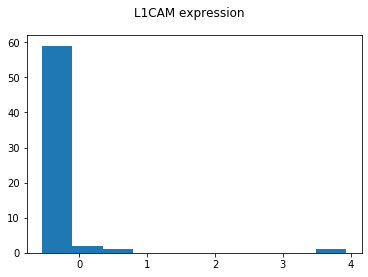

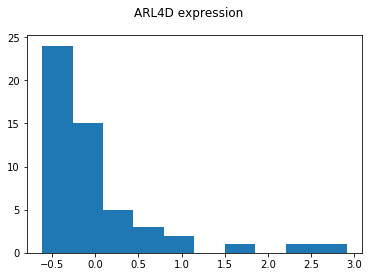

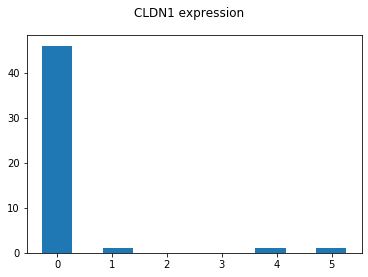

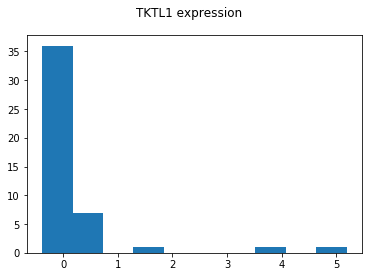

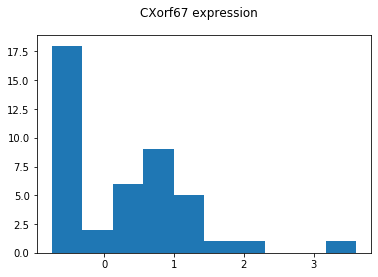

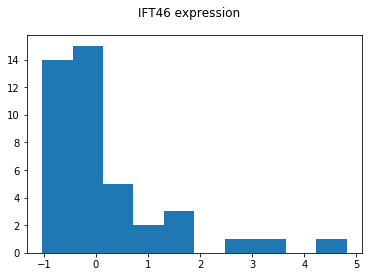

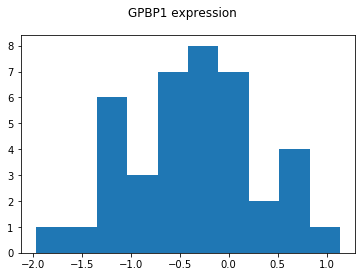

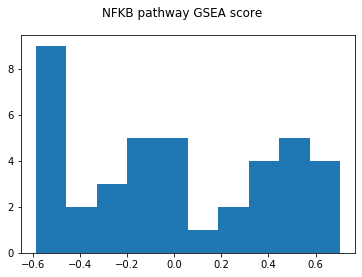

(40, 33) 36 9 4 2


In [6]:
import pandas as pd
import numpy as np 
import  pyreadr
import sys
from matplotlib import pyplot as plt

EPN_final = pd.read_csv("/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/results/EPN_all_data.tsv", sep="\t")

ST_EPN_RELA = []
ST_EPN_YAP1 = []
PT_EPN_A = []
PT_EPN_B = []



def addsampletosubtype_removefromdf(EPN_df, subtypelistname, sample_list):
    subtypelistname.extend(sample_list)
    EPN_df = EPN_df[~EPN_df['sample_id'].isin(sample_list)]
    return(EPN_df, subtypelistname)

#### Looking for  ST_EPN_RELA sub-group samples
# PTEN--TAS2R1 fusion column is all zeros 
EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['C11orf95--RELA'] > 0]["sample_id"].tolist())
# This whole column is zeros 
EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['LTBP3--RELA'] > 0]["sample_id"].tolist())
# This column is empty EPN_final["PTEN--TAS2R1_fusion"]

EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['9p_loss'] > 0]["sample_id"].tolist())
#This whole column is zeros 
EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['9q_loss'] > 0]["sample_id"].tolist())
# Cannot find clear outliers from the histogram plots for RELA Z-scores 
#EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
#                            list(EPN_final.loc[EPN_final['RELA_expr_zscore'] > 3]["sample_id"]))
# One Z-score above 3 
fig = plt.figure(figsize=(20,10))
L1CAM_fig = plt.figure()
plt.hist(list(EPN_final["L1CAM_expr_zscore"])) 
plt.suptitle('L1CAM expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/L1CAM_hist.png', dpi=L1CAM_fig.dpi)
EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['L1CAM_expr_zscore'] > 3]["sample_id"].tolist())
# Look for CDKN2A loss 
EPN_final, ST_EPN_RELA =  addsampletosubtype_removefromdf(EPN_final, ST_EPN_RELA, 
                            EPN_final.loc[EPN_final['consensus_focal_CN_CDKN2'] == "loss"]["sample_id"].tolist())



#### Looking for  ST_EPN_YAP1 sub-group samples
# All zeros column
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['C11orf95--YAP1'] > 0]["sample_id"].tolist())
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['YAP1--MAMLD1'] > 0]["sample_id"].tolist())
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['C11orf95--MAML2'] > 0]["sample_id"].tolist())
# All zeros
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['YAP1--FAM118B'] > 0]["sample_id"].tolist())
# All zeros
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['11q_loss'] > 0]["sample_id"].tolist())
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['11q_gain'] > 0]["sample_id"].tolist())
# Two sample higher than 1.7, look like outliers based on histogram
ARL4D_fig = plt.figure()
plt.hist(list(EPN_final["ARL4D_expr_zscore"])) 
plt.suptitle('ARL4D expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/ARL4D_hist.png', dpi=ARL4D_fig.dpi)
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['ARL4D_expr_zscore'] > 1.5]["sample_id"].tolist())
# One sample higher than 1.0, another sample at 0.28 also look like an outlier but a cutoff value of 0.25 maybe too small?? 
CLDN1_fig = plt.figure()
plt.hist(list(EPN_final["CLDN1_expr_zscore"])) 
plt.suptitle('CLDN1 expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/ARL4D_hist.png', dpi=CLDN1_fig.dpi)
EPN_final, ST_EPN_YAP1 = addsampletosubtype_removefromdf(EPN_final, ST_EPN_YAP1, 
                            EPN_final.loc[EPN_final['CLDN1_expr_zscore'] > 1]["sample_id"].tolist())




#### Looking for  PT_EPN_A sub-group samples

EPN_final, PT_EPN_A = addsampletosubtype_removefromdf(EPN_final, PT_EPN_A, 
                           EPN_final.loc[EPN_final['1q_loss'] > 0]["sample_id"].tolist())
# Anythong above 2 Z-score looks like an outlier
TKTL1_fig = plt.figure()
plt.hist(list(EPN_final["TKTL1_expr_zscore"])) 
plt.suptitle('TKTL1 expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/TKTL1_hist.png', dpi=TKTL1_fig.dpi)
EPN_final, PT_EPN_A = addsampletosubtype_removefromdf(EPN_final, PT_EPN_A, 
                            EPN_final.loc[EPN_final['TKTL1_expr_zscore'] > 1]["sample_id"].tolist())
# Any score above 2.0? Two samples at 2.03 and 2.07. Not includng this one in the PF_EPN_A
CXorf67_fig = plt.figure()
plt.hist(list(EPN_final["CXorf67_expr_zscore"])) 
plt.suptitle('CXorf67 expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/CXorf67_hist.png', dpi=CXorf67_fig.dpi)
EPN_final, PT_EPN_A = addsampletosubtype_removefromdf(EPN_final, PT_EPN_A, 
                            EPN_final.loc[EPN_final['CXorf67_expr_zscore'] > 2.10]["sample_id"].tolist())




#### Looking for  PT_EPN_B sub-group samples
EPN_final, PT_EPN_B = addsampletosubtype_removefromdf(EPN_final, PT_EPN_B, 
                            EPN_final.loc[EPN_final['6q_loss'] > 0]["sample_id"].tolist())
#All zeros column 
EPN_final, PT_EPN_B = addsampletosubtype_removefromdf(EPN_final, PT_EPN_B, 
                            EPN_final.loc[EPN_final['6p_loss'] > 0]["sample_id"].tolist())
# Two sample with Z-scores above 3
IFT46_fig = plt.figure()
plt.hist(list(EPN_final["IFT46_expr_zscore"])) 
plt.suptitle('IFT46 expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/IFT46_hist.png', dpi=IFT46_fig.dpi)
EPN_final, PT_EPN_B = addsampletosubtype_removefromdf(EPN_final, PT_EPN_B, 
                            EPN_final.loc[EPN_final['IFT46_expr_zscore'] > 3]["sample_id"].tolist())
# Look at GPB1 expression Z-scores  
GPBP1_fig = plt.figure()
plt.hist(list(EPN_final["GPBP1_expr_zscore"])) 
plt.suptitle('GPBP1 expression')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/GPBP1_hist.png', dpi=GPBP1_fig.dpi)
EPN_final, PT_EPN_B = addsampletosubtype_removefromdf(EPN_final, PT_EPN_B, 
                            list(EPN_final.loc[EPN_final['GPBP1_expr_zscore'] > 2]["sample_id"]))




# GSEA pathway score histogram 
fig = plt.figure()
plt.hist(list(EPN_final["NFKB_pathway_GSEAscore"])) 
plt.suptitle('NFKB pathway GSEA score')
plt.show()
fig.savefig('/Users/kogantit/Documents/OpenPBTA/OpenPBTA-analysis/analyses/molecular-subtyping-EPN/NFKB_hist.png', dpi=fig.dpi)


print(EPN_final.shape, len(ST_EPN_RELA), len(ST_EPN_YAP1), len(PT_EPN_A), len(PT_EPN_B))

# Not used above - "GISTIC_focal_CN_CDKN2A" - Values range from -0.1, 0.0 and 2.0. Only one sample has 2.0, should that be included in ST_EPN_RELA
# Not used above - "breaks_density-chromosomal_instability_CNV" - no outliers
# Not used above - "breaks_density-chromosomal_instability_SV" - no outliers





In [13]:
print(sorted(EPN_final['breaks_density-chromosomal_instability_SV'])

[0.05589288994276436, 0.08089760386452736, 0.0897227970133849, 0.09045822977578967, 0.09634169187502804, 0.09928342292464724, 0.10369601949907599, 0.10443145226148078, 0.10957948159831432, 0.11105034712312392, 0.1147275109351479, 0.1147275109351479, 0.1257590023712198, 0.1264944351336246, 0.12943616618324374, 0.1301715989456486, 0.14193852314412528, 0.14267395590653004, 0.14782198524336362, 0.15811804391703074, 0.16105977496664994, 0.1632660732538643, 0.18459362336360333, 0.1867999216508177, 0.1890062199380321, 0.20739203899815198, 0.21180463557258072, 0.21254006833498554, 0.21695266490941428, 0.22283612700865266, 0.22357155977105744, 0.24931170645522524, 0.25004713921763005, 0.278729016951417, nan, nan, nan, 0.27284555485217865, nan, 0.29858570153634645, 0.3081463274476088, 0.3338864741317766, 0.4596454765029964, nan, nan] [-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [54]:
sorted(EPN_final['breaks_density-chromosomal_instability_CNV'])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0007354327624047942,
 0.0007354327624047942,
 0.0007354327624047942,
 0.0007354327624047942,
 0.0007354327624047942,
 0.0007354327624047942,
 0.0022062982872143827,
 0.0029417310496191768,
 0.0029417310496191768,
 0.0029417310496191768,
 0.0044125965744287645,
 0.0058834620992383535,
 0.0058834620992383535,
 0.006618894861643148,
 nan,
 0.006618894861643148,
 nan,
 0.0073543276240479434,
 nan,
 0.0073543276240479434,
 0.015444088010500678,
 nan,
 0.0022062982872143827,
 0.018385819060119855,
 nan,
 nan]